## This code is to find out the different of each epoch and batch size combination

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path

In [2]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path = parent_path / 'Data/googlenet/fashion_mnist/'
print('The data path is:', data_path)

The current path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/code
The parent path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W
The data path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet/fashion_mnist


### extract data

In [4]:
batch_sizes = [64]
epochs = [10]
rounds = 1

#### read all the data from all the folders

In [5]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder_names = os.listdir(data_path)
print('The folder names are:', folder_names)
print('The folder list is:', folder_list)

# find the common folders
common_folders = list(set(folder_list).intersection(folder_names))
# sort the common folders
common_folders.sort()
print('The common folders are:', common_folders)
print(len(common_folders))

The folder names are: ['E10_B64_R0']
The folder list is: ['E10_B64_R0']
The common folders are: ['E10_B64_R0']
1


### analysis data

#### find the data in same epoch and batch size

In [6]:
# read the data from the common folders
datafolder = data_path / common_folders[0]
print('The data folder is:', datafolder)
# find the files in the data folder
files = os.listdir(datafolder)
print('The files are:', files)


The data folder is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet/fashion_mnist/E10_B64_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Train_acc.npy', 'Epoch_energy.npy', 'Test_acc.npy']


In [7]:
# read all the files in the common folders
LayersTime = np.load(datafolder / 'Layers_time.npy', allow_pickle=True)
TrainPartTime = np.load(datafolder / 'Train_part_time.npy', allow_pickle=True)
EpochTime = np.load(datafolder / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy = np.load(datafolder / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc = np.load(datafolder / 'Train_acc.npy', allow_pickle=True)
TestAcc = np.load(datafolder / 'Test_acc.npy', allow_pickle=True)

#### LayersTime

In [8]:
LayersName = ['S0_C0', 'S0_R1', 'S0_M2', 'S1_C0', 'S1_R1', 'S1_C2', 'S1_R3', 'S1_M4', 'S2_I0_Cp1_1', 'S2_I0_Cp2_1', 'S2_I0_Cp2_2', 'S2_I0_Cp3_1', 'S2_I0_Cp3_2', 'S2_I0_Mp4_1', 'S2_I0_Cp4_2', 'S2_I1_Cp1_1', 'S2_I1_Cp2_1', 'S2_I1_Cp2_2', 'S2_I1_Cp3_1', 'S2_I1_Cp3_2', 'S2_I1_Mp4_1', 'S2_I1_Cp4_2', 'S2_M2', 'S3_I0_Cp1_1', 'S3_I0_Cp2_1', 'S3_I0_Cp2_2', 'S3_I0_Cp3_1', 'S3_I0_Cp3_2', 'S3_I0_Mp4_1', 'S3_I0_Cp4_2', 'S3_I1_Cp1_1', 'S3_I1_Cp2_1', 'S3_I1_Cp2_2', 'S3_I1_Cp3_1', 'S3_I1_Cp3_2', 'S3_I1_Mp4_1', 'S3_I1_Cp4_2', 'S3_I2_Cp1_1', 'S3_I2_Cp2_1', 'S3_I2_Cp2_2', 'S3_I2_Cp3_1', 'S3_I2_Cp3_2', 'S3_I2_Mp4_1', 'S3_I2_Cp4_2', 'S3_I3_Cp1_1', 'S3_I3_Cp2_1', 'S3_I3_Cp2_2', 'S3_I3_Cp3_1', 'S3_I3_Cp3_2', 'S3_I3_Mp4_1', 'S3_I3_Cp4_2', 'S3_I4_Cp1_1', 'S3_I4_Cp2_1', 'S3_I4_Cp2_2', 'S3_I4_Cp3_1', 'S3_I4_Cp3_2', 'S3_I4_Mp4_1', 'S3_I4_Cp4_2', 'S3_M5', 'S4_I0_Cp1_1', 'S4_I0_Cp2_1', 'S4_I0_Cp2_2', 'S4_I0_Cp3_1', 'S4_I0_Cp3_2', 'S4_I0_Mp4_1', 'S4_I0_Cp4_2', 'S4_I1_Cp1_1', 'S4_I1_Cp2_1', 'S4_I1_Cp2_2', 'S4_I1_Cp3_1', 'S4_I1_Cp3_2', 'S4_I1_Mp4_1', 'S4_I1_Cp4_2', 'S4_A2', 'S4_F3']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 75


In [9]:
print('The shape of LayersTime is:', LayersTime.shape)
print(LayersTime)

The shape of LayersTime is: (21, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


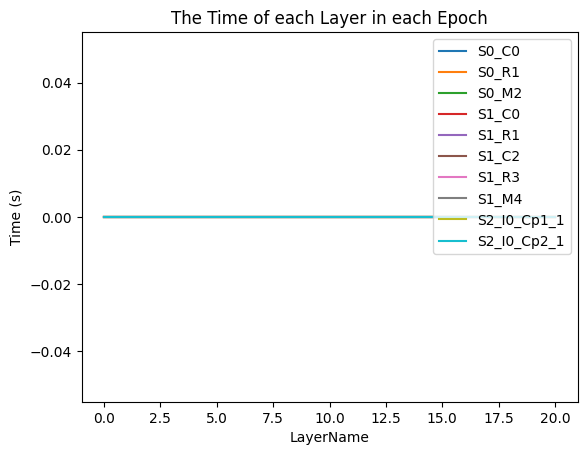

In [10]:
# plot the LayersTime of each epoch using dot plot
fig, ax = plt.subplots()
for i in range(LayersTime.shape[1]):    
    ax.plot(LayersTime[:, i], label=LayersName[i])
ax.set_xlabel('LayerName')
ax.set_ylabel('Time (s)')
ax.set_title('The Time of each Layer in each Epoch')
ax.legend()
plt.show()